### Keywords: [Terms and their meanings]

- **Annualized Return:**	The average return each year over the time period. Higher = more profit.
- **Annualized Volatility:**	Measures how much the asset price fluctuates annually. Higher = more risky/unstable.
- **Sharpe Ratio:**   Measures risk-adjusted return: how much return you get per unit of risk. Higher = better performance for the risk taken. Answers:
‚ÄúHow much more return am I getting compared to a safe investment?‚Äù
  Formula:  $(Annualized Return - RiskFreeRate) / Annualized Volatility$
- **Risk-Free Rate:** The risk-free rate is the theoretical return on an investment that has zero risk of loss. It's the **baseline** you compare other investments against. Commonly approximated using short-term government securities like T-Bills.
- **Dividend:** In Simple Words, If you own a stock (like a tiny part of a company), the company may share some of its earnings with you ‚Äî that‚Äôs your dividend.
- **Adjusted Close Price:** closing price modified for dividends, stock splits, and similar events. It shows the **asset‚Äôs real value** to an investor, making it ideal for accurate historical comparisons.
- **Normalized Price Performance:** This shows how each asset has performed relative to its own value, not their actual price.
- **Monthly Return:** The percentage change in an asset's price from one month to the next.
- **Median:** The middle value in a dataset ‚Äî splits the data into two equal halves.
- **Interquartile Range (IQR):** The range between the 25th percentile (Q1) and 75th percentile (Q3) ‚Äî represents the middle 50% of the data.
- **Outliers:** Data points that lie significantly outside the IQR range ‚Äî they represent unusually high or low values, unusual months with very high/low returns.

### Importing Libraries and Configuring Plots

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from matplotlib.ticker import FuncFormatter 

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
warnings.filterwarnings('ignore') 

### Define Data Location and Load Filtered Data

In [3]:
input_data_folder = '../Cleaned_Exports'
adj_close_filename = 'aligned_adj_close_prices.csv'
returns_filename = 'calculated_monthly_returns.csv'

adj_close_filepath = os.path.join(input_data_folder, adj_close_filename)
returns_filepath = os.path.join(input_data_folder, returns_filename)

adj_close_df = pd.read_csv(adj_close_filepath, index_col='Date', parse_dates=True)

monthly_returns = pd.read_csv(returns_filepath, index_col='Date', parse_dates=True)

### Calculate Risk and Return Metrics

In [4]:
annualized_returns = monthly_returns.mean() * 12
annualized_volatility = monthly_returns.std() * np.sqrt(12)
risk_free_rate = monthly_returns['BIL'].mean() * 12
sharpe_ratio = (annualized_returns - risk_free_rate) / annualized_volatility

metrics_df = pd.DataFrame({
    'Annualized Return': annualized_returns,
    'Annualized Volatility': annualized_volatility,
    'Sharpe Ratio': sharpe_ratio
})

print("\nCalculated Performance Metrics:")
# Format output for better readability
print(metrics_df.to_string(formatters={
    'Annualized Return': '{:.2%}'.format,
    'Annualized Volatility': '{:.2%}'.format,
    'Sharpe Ratio': '{:.2f}'.format
}))


Calculated Performance Metrics:
        Annualized Return Annualized Volatility Sharpe Ratio
TSLA               16.90%                61.66%         0.23
BTC-USD            41.33%                63.82%         0.60
AGG                -1.50%                 6.99%        -0.62
BIL                 2.83%                 1.05%         0.00


#### Interpretation:
**High Return, High Risk:**
- **BTC-USD and TSLA** are volatile but have high returns, especially Bitcoin.
- Their Sharpe Ratios are positive, meaning they gave good return for the risk.

**Low Risk, Low Return:**
- **BIL** is super stable but gives almost no profit (Sharpe Ratio is 0).

**Negative Return:**
- **AGG** actually lost money on average and had some risk ‚Äî hence the negative Sharpe Ratio (-0.62).
- Not a good risk-return trade-off.

**Performance Summary**: The output table summarizes the historical risk and return characteristics observed during the analysis period (as interpreted previously).


### Plot Price Trends

#### **Importance of Plotting Trends :**
Plotting price trends allows for quick visual assessment of historical performance, volatility, relative movements between assets, and identification of major peaks and troughs that numerical tables alone don't easily reveal.

In [5]:
adj_close_filename = 'aligned_adj_close_prices.csv'
adj_close_filepath = os.path.join(input_data_folder, adj_close_filename)
adj_close_df = pd.read_csv(adj_close_filepath, index_col='Date', parse_dates=True)

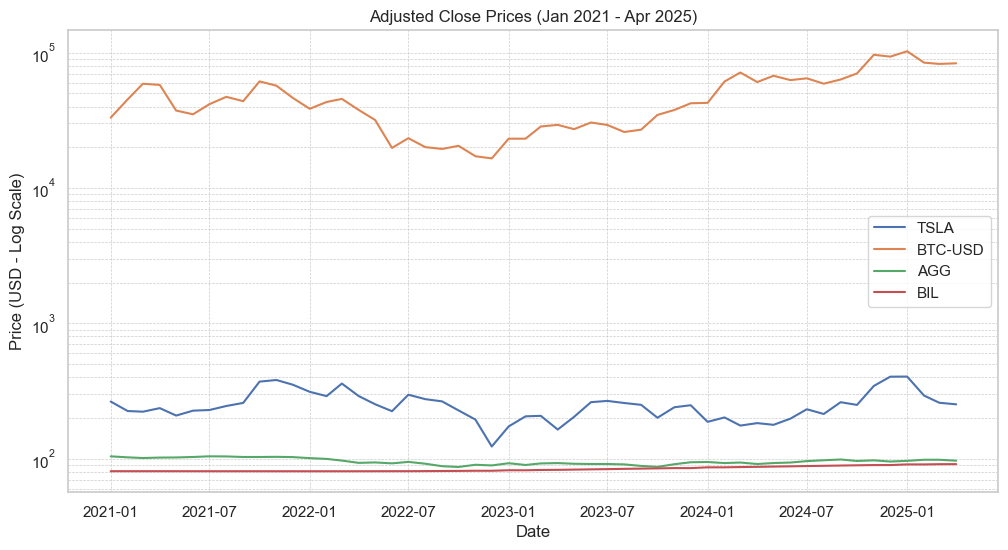

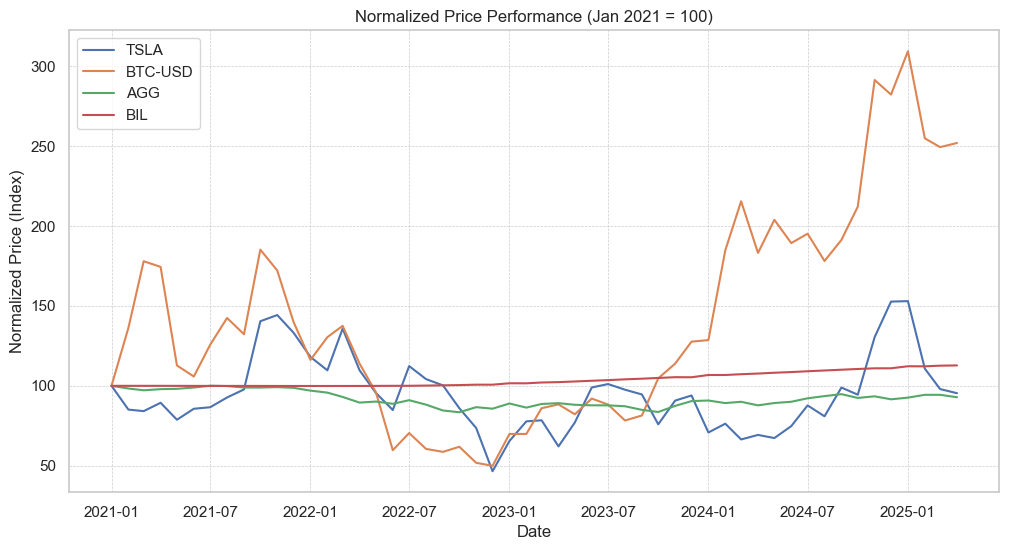

In [8]:
if 'adj_close_df' in locals() and not adj_close_df.empty:
    # Plot Raw Adjusted Close Prices (Using Log Scale due to BTC-USD)
    plt.figure()
    for col in adj_close_df.columns:
        plt.plot(adj_close_df.index, adj_close_df[col], label=col)
    plt.title(f'Adjusted Close Prices ({adj_close_df.index.min().strftime("%b %Y")} - {adj_close_df.index.max().strftime("%b %Y")})')
    plt.xlabel('Date')
    plt.ylabel('Price (USD - Log Scale)') 
    plt.yscale('log') # Apply log scale
    plt.legend()
    plt.grid(True, which="both", ls="--", linewidth=0.5) # Grid helps log scale reading

    plt.show()

    # Plot Normalized Prices (Starting at 100)
    normalized_prices = (adj_close_df / adj_close_df.iloc[0]) * 100
    plt.figure() # Ensure a new figure
    for col in normalized_prices.columns:
        plt.plot(normalized_prices.index, normalized_prices[col], label=col)
    plt.title(f'Normalized Price Performance ({normalized_prices.index.min().strftime("%b %Y")} = 100)')
    plt.xlabel('Date')
    plt.ylabel('Normalized Price (Index)')
    plt.legend()
    plt.grid(True, ls="--", linewidth=0.5)
    plt.show()
else:
    print("\nSkipping price trend plots because adjusted close data is not available or empty.")

#### Note:
**Why Log Scale?**
- The logarithmic scale helps compare assets with large price differences.
- Instead of equal steps (like 100, 200, 300), it scales in powers of 10:
e.g. 10, 100, 1,000, 10,000, 100,000
- That‚Äôs why BTC-USD, even though it's so high in price, can be compared in shape and pattern with TSLA, AGG, and BIL.

### Interpretation:-
#### **Graph 1**: Adjusted Close Prices
uses a log scale to compare the price performance of four assets from 2021 to early 2025.
- **High Volatility & Growth Potential:** BTC-USD shows the most extreme price swings (highest volatility) but also achieved the greatest overall percentage growth during this period. TSLA is also highly volatile with significant price fluctuations but less overall growth than Bitcoin by the end.
- **Low Volatility & Stability:** AGG (bonds) and BIL (T-bills) demonstrate very low volatility, with their prices remaining relatively flat and stable, especially compared to Bitcoin and Tesla. BIL is particularly stable.

Essentially, the graph visually separates high-risk/high-potential-return assets (BTC, TSLA) from low-risk/low-return, stable assets (AGG, BIL) based on their price movements over this timeframe.

#### **Graph 2**: Normalized Price Performance

-  Normalization sets all assets to start at 100 in Jan 2021.
-  This helps compare performance over time, even if their actual prices are wildly different.
  
So if an asset goes from 100 to 150, it means it grew 50% from the starting point.

üüß **BTC-USD:**
- Highly volatile with big spikes.
- Went from 100 ‚Üí over 300, which means ~200% growth.
- Shows highest return among all.

üîµ **TSLA:**
- Also volatile but less extreme than BTC.
- Peaks and dips with noticeable swings.
- Ends a bit higher than where it started (around ~100-120), showing modest growth.

üü¢ **AGG:**
- Fairly flat, slightly declining.
- Went from 100 ‚Üí ~90, showing negative performance.
- Low risk, low return bond ETF.

üî¥ **BIL:**
- Very stable and slow upward slope.
- Went from 100 ‚Üí ~110, meaning about 10% growth over 4+ years.
- Typical of a low-risk Treasury Bill ETF.

üí° **What This Suggests:**
- BTC-USD had the highest return, but also huge volatility = high risk.
- TSLA had some ups and downs, moderate risk.
- AGG actually lost value slightly.
- BIL provided small but stable gains = low risk, low reward.

### Plot Return Distributions

#### Graph 1:
‚úÖ **What it shows:**
- The frequency of monthly returns (% change from month to month).
- You‚Äôre analyzing how **volatile or stable** the monthly gains/losses are.

üîç **Use Case:**
- Helps measure risk (volatility).
- Wide distribution ‚Üí **more risk**.
- Narrow distribution ‚Üí **less risk**.
  
For example:
- **BTC-USD** and **TSLA** have high return variability.
- AGG and BIL are tightly packed around 0%, indicating stability.
  
üåä **KDE Curve (the smooth line):**
- This is the Kernel Density Estimation curve, a smooth version of the histogram.
- It estimates the probability distribution of returns.
- Peaks indicate where returns were most common.
- Taller, narrow KDE = more predictability (returns are consistent).
- Wider KDE = more volatility (returns vary a lot).
#### **Purpose:**
These plots work together to give a comprehensive visual summary of the distribution of monthly returns for each asset.
- The **Histogram/KDE** shows the shape and frequency of returns across the entire range.
- The **Box Plot** provides a concise summary of key statistics: the median (central line), the middle 50% of returns (the box/IQR), the typical range (whiskers), and extreme outlier months (circles).


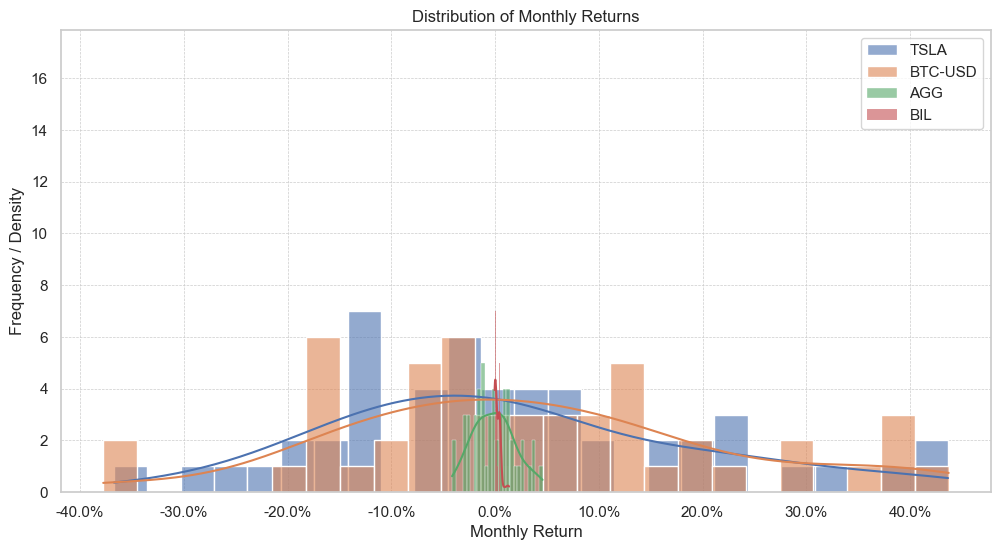

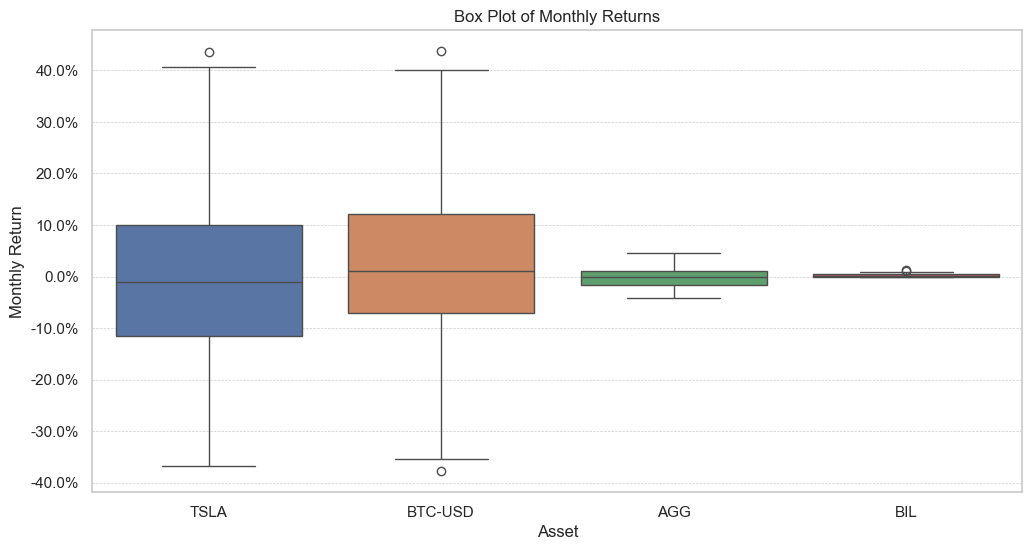

In [7]:

if 'monthly_returns' in locals() and not monthly_returns.empty:
    # Histogram/KDE Plot
    plt.figure()
    for col in monthly_returns.columns:
        sns.histplot(monthly_returns[col], kde=True, label=col, alpha=0.6, bins=25) # Slightly more bins
    plt.title('Distribution of Monthly Returns')
    plt.xlabel('Monthly Return')
    plt.ylabel('Frequency / Density')
    plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.1%}'.format(x)))
    plt.legend()
    plt.grid(True, ls="--", linewidth=0.5)
    plt.show()

    # Box plot
    plt.figure()
    sns.boxplot(data=monthly_returns)
    plt.title('Box Plot of Monthly Returns')
    plt.ylabel('Monthly Return')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
    plt.xlabel('Asset')
    plt.grid(True, axis='y', ls="--", linewidth=0.5)
    plt.show()
else:
    print("\nSkipping return distribution plots because returns data is not available or empty.")

##### Together, these plots clearly illustrate:
- **High Volatility (TSLA & BTC-USD):** Both plots show a very wide range of monthly returns. The histograms are spread out, and the box plots have large boxes (large interquartile range) and long whiskers, often with outliers, confirming significant month-to-month risk and fluctuation. BTC appears to have a slightly higher median return (center line in the box) than TSLA.
- **Low Volatility (AGG & BIL):** Both plots show returns tightly clustered around 0%. The histograms are narrow and peaked, and the box plots are very compact with short whiskers. BIL is exceptionally stable, with its box plot being almost flat. This visually confirms their low-risk, stable nature.

In essence, the two plots reinforce each other, vividly contrasting the high-risk, high-dispersion return profile of TSLA and Bitcoin against the low-risk, low-dispersion profile of AGG and BIL during the period studied.

 -------
Having visualized the spread and distribution of monthly returns, we now isolate and directly compare the calculated annualized volatility (standard deviation) for each asset.
Why Plot This?

### Plot Volatility Comparison

**Was it Needed?**
- While the volatility numbers were already presented in the table, this chart is highly useful for emphasis. It makes the stark differences in risk levels immediately and dramatically apparent, reinforcing the findings from the distribution plots and the table in a very accessible way.

**What Does it Do?**
- This bar chart plots the single calculated "Annualized Volatility" percentage for each asset. The height of each bar directly corresponds to the volatility value, allowing for easy visual comparison of risk between TSLA, BTC-USD, AGG, and BIL.


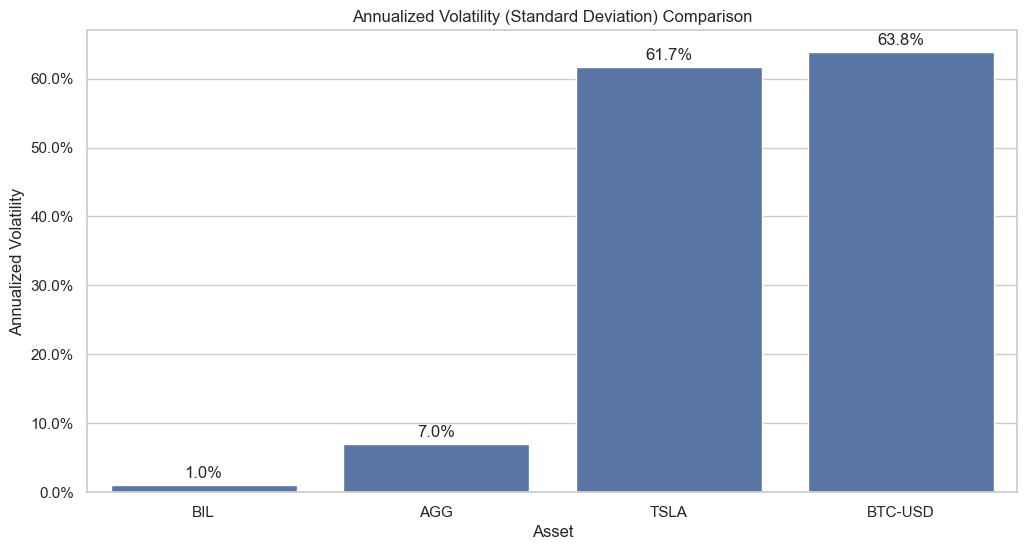

In [8]:
if 'metrics_df' in locals() and not metrics_df.empty and 'Annualized Volatility' in metrics_df.columns:
    plt.figure() 
    metrics_df_sorted = metrics_df.sort_values('Annualized Volatility')
    ax = sns.barplot(x=metrics_df_sorted.index, y=metrics_df_sorted['Annualized Volatility'])
    plt.title('Annualized Volatility (Standard Deviation) Comparison')
    plt.xlabel('Asset')
    plt.ylabel('Annualized Volatility')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

    # Add values on top of bars
    for container in ax.containers:
        ax.bar_label(container, fmt='{:.1%}', padding=3)

    plt.show()
else:
    print("\nSkipping volatility comparison plot because metrics data is not available or empty.")

- **BTC-USD (63.8%)**: Highest risk, highly unpredictable.
- **TSLA (61.7%):** Very high volatility, risky tech stock.
- **AGG (7.0%):** Low volatility, stable bond ETF.
- **BIL (1.0%):** Safest, minimal risk ‚Äî ideal for capital preservation

Okay, we've seen the risk levels individually. Now, let's combine risk (volatility) and reward (annualized return) onto a single chart to visualize the classic risk-reward tradeoff for these assets.

### Plot Risk-Reward Tradeoff

- This plot is fundamental because it visually represents the core principle of investing: **how much return (reward) did an investor get for the amount of risk (volatility) they took on?** It allows for simultaneous comparison across both dimensions.

**Was it Needed?**
- Absolutely essential. This is arguably the most important summary visualization. While the table has the numbers, this scatter plot makes the relationship between risk and return, and the relative positioning of each asset, instantly clear. It synthesizes the individual metrics into a single, comparative picture of investment profile.

It plots each asset as a point on a 2D graph:
- **The horizontal position (X-axis) shows its Annualized Volatility (Risk)** ‚Äì further right means riskier.
- **The vertical position (Y-axis) shows its Annualized Return (Reward)** ‚Äì higher up means more profitable.
The location of each point summarizes its risk-reward profile during the period.

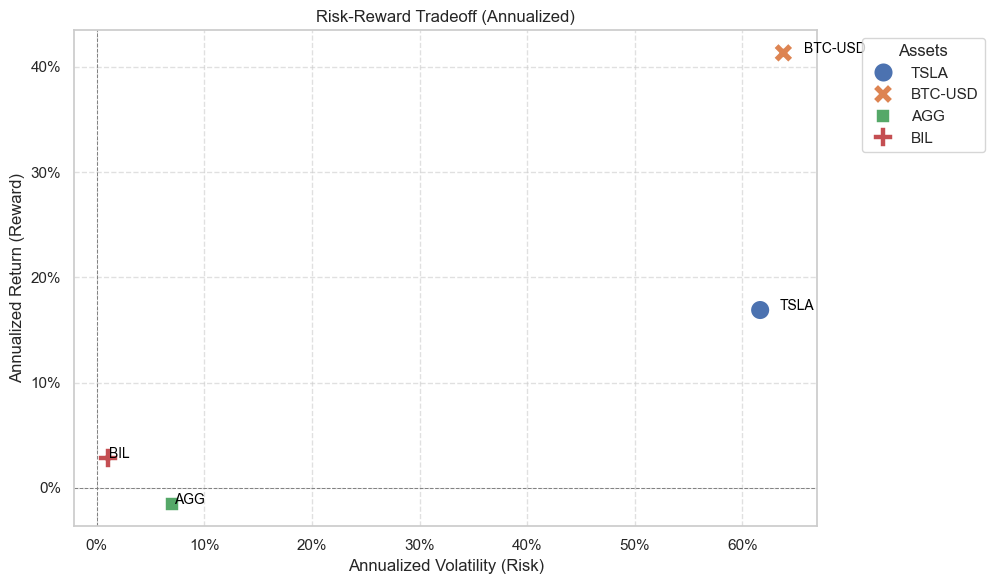

In [9]:
if 'metrics_df' in locals() and not metrics_df.empty and 'Annualized Volatility' in metrics_df.columns and 'Annualized Return' in metrics_df.columns:
    plt.figure() 
    sns.scatterplot(x='Annualized Volatility', y='Annualized Return', data=metrics_df, s=200, hue=metrics_df.index, style=metrics_df.index, legend=True) # Increased size

    for i in range(metrics_df.shape[0]):
        plt.text(x=metrics_df['Annualized Volatility'].iloc[i]*1.03, # Slightly adjusted offset
                 y=metrics_df['Annualized Return'].iloc[i],
                 s=metrics_df.index[i],
                 fontdict=dict(color='black', size=10))

    plt.title('Risk-Reward Tradeoff (Annualized)')
    plt.xlabel('Annualized Volatility (Risk)')
    plt.ylabel('Annualized Return (Reward)')
    plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    plt.axhline(0, color='grey', linestyle='--', linewidth=0.7)
    plt.axvline(0, color='grey', linestyle='--', linewidth=0.7)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    plt.legend(title='Assets', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout(rect=[0, 0, 0.85, 1]) 
    plt.show()
else:
    print("\nSkipping risk-reward plot because metrics data is not available or empty.")

This chart clearly separates the assets into two groups:
- **Low-Risk, Low-Return (Bottom-Left):** **BIL** and **AGG** cluster here, offering minimal volatility but also minimal (or negative, for AGG) returns. **BIL** provided a small positive return for very little risk.
- **High-Risk, High-Return (Top-Right):** **TSLA** and **BTC-USD** sit here, demonstrating that achieving significantly higher returns required accepting vastly higher volatility. **BTC-USD** achieved the highest return but also came with the highest risk, positioned slightly above and to the right of **TSLA**.

### Calculate and Plot Rolling Volatility

**What does this do?**
- At each point in time (starting 12 months after the data begins), it calculates the annualized standard deviation of the preceding 12 months of monthly returns.
- It plots these rolling volatility calculations as time series lines for each asset.
- This effectively shows a "moving average" of volatility, smoothing out short-term noise and highlighting longer-term trends in risk.

**Was it Needed?**
- **Yes, highly valuable.** Financial markets are dynamic. A single average volatility number masks important changes over time.
- This plot adds a crucial time dimension to the risk analysis, revealing trends and shifts in asset behavior that are missed otherwise.

**Why Plot This?**
- To visualize how the measured risk (volatility) of each asset evolved throughout the analysis period.
- To identify periods where assets became significantly more or less volatile compared to their long-term average.
- To understand if and when risk levels converged or diverged between the assets.

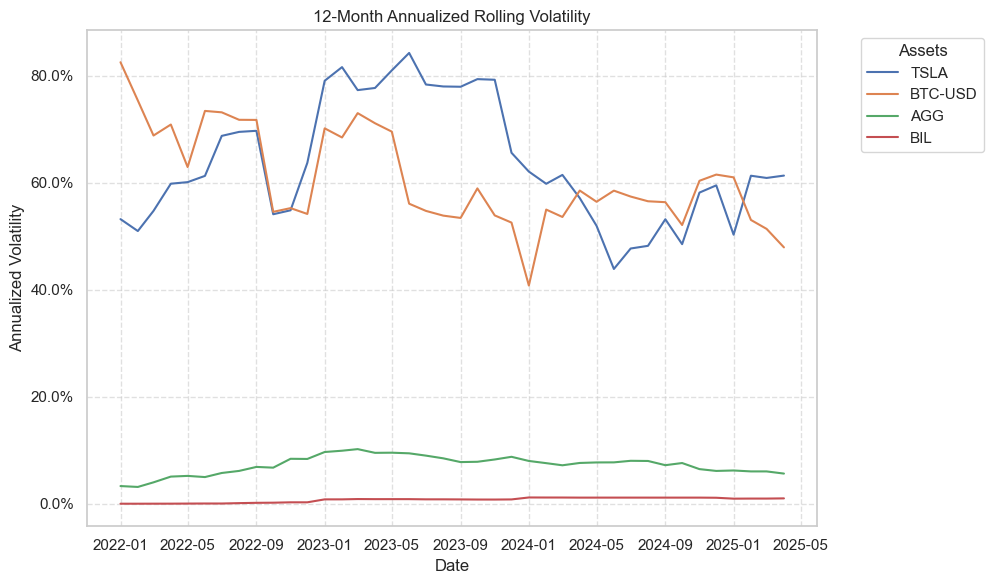

In [10]:
if 'monthly_returns' in locals() and not monthly_returns.empty:

    # Define the rolling window size (in months)
    rolling_window = 12 # You can change this (e.g., to 6)

    # Calculate rolling standard deviation of monthly returns
    rolling_std = monthly_returns.rolling(window=rolling_window).std()

    # Annualize the rolling standard deviation
    annualized_rolling_volatility = rolling_std * np.sqrt(12)

    # Plot the Annualized Rolling Volatility
    plt.figure() # Ensure a new figure
    for col in annualized_rolling_volatility.columns:
        plt.plot(annualized_rolling_volatility.index, annualized_rolling_volatility[col], label=f'{col}') # Simplified label

    plt.title(f'{rolling_window}-Month Annualized Rolling Volatility')
    plt.xlabel('Date')
    plt.ylabel('Annualized Volatility')
    # Format y-axis as percentage
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
    plt.legend(title='Assets', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout for legend
    plt.show()

else:
    print("\nSkipping rolling volatility plot because monthly returns data is not available or empty.")

- **Confirmation:** Reaffirms that TSLA and BTC-USD consistently exhibited far higher volatility than AGG and BIL.
- **Dynamic Risk:** Shows that TSLA's and BTC-USD's volatility levels were not constant; they fluctuated significantly over time, with distinct peaks and troughs (e.g., TSLA peaked mid-2023, BTC early 2022).
- **Changing Bond Risk:** Notably reveals that AGG (bonds), while low risk overall, experienced a clear increase in volatility starting in 2022 and peaking in 2023, before subsiding slightly.
- **Stability:** BIL remained exceptionally stable, with its rolling volatility staying consistently near zero throughout the entire period.

## Conclusion:

This analysis vividly demonstrated the classic risk-reward tradeoff by comparing high-risk (BTC-USD, TSLA) and low-risk (AGG, BIL) assets from 2021-2025. The high-risk assets showed extreme volatility, confirmed through dramatic price swings and wide return distributions, offering the potential for high returns (achieved notably by BTC-USD) but demanding tolerance for significant fluctuation. Conversely, low-risk assets provided stability but yielded minimal (BIL) or even negative (AGG) returns during this period. Visualizations like the risk-reward plot and rolling volatility underscored that higher returns required accepting substantial, non-static risk, validating the need for understanding risk metrics when comparing such distinct investment types.